### The target class "cardio" equals to 1, when patient has cardiovascular desease, and it's 0, if patient is healthy.

In [1]:
import pandas as pd                                                               #loading dataset
df= pd.read_csv('E:\cardiovascular-disease-dataset\cardio_train.csv',sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df = df[:1000]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
id             1000 non-null int64
age            1000 non-null int64
gender         1000 non-null int64
height         1000 non-null int64
weight         1000 non-null float64
ap_hi          1000 non-null int64
ap_lo          1000 non-null int64
cholesterol    1000 non-null int64
gluc           1000 non-null int64
smoke          1000 non-null int64
alco           1000 non-null int64
active         1000 non-null int64
cardio         1000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 101.6 KB


In [5]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,701.971000,19431.52100,1.359000,164.102000,74.734300,127.463000,92.655000,1.393000,1.241000,0.095000,0.04600,0.778000,0.507000
std,405.450658,2521.04067,0.479947,8.363704,15.259966,18.106918,102.072635,0.697881,0.589293,0.293362,0.20959,0.415799,0.500201
min,0.000000,14321.00000,1.000000,76.000000,41.000000,11.000000,30.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,343.750000,17509.50000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.00000,1.000000,0.000000
50%,717.000000,19666.00000,1.000000,164.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.00000,1.000000,1.000000
75%,1049.250000,21367.25000,2.000000,170.000000,84.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.00000,1.000000,1.000000
max,1387.000000,23661.00000,2.000000,188.000000,200.000000,200.000000,1100.000000,3.000000,3.000000,1.000000,1.00000,1.000000,1.000000


In [7]:
df.isnull().values.any()

False

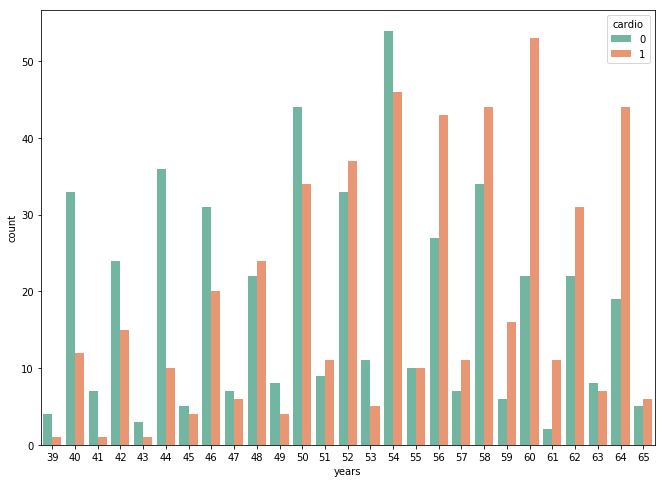

In [8]:
from matplotlib import rcParams                                     #people above 55 have high risk of cardiovascular diseases
import seaborn as sns
rcParams['figure.figsize'] = 11, 8
df['years'] = (df['age'] / 365).round().astype('int')
sns.countplot(x='years', hue='cardio', data = df, palette="Set2");

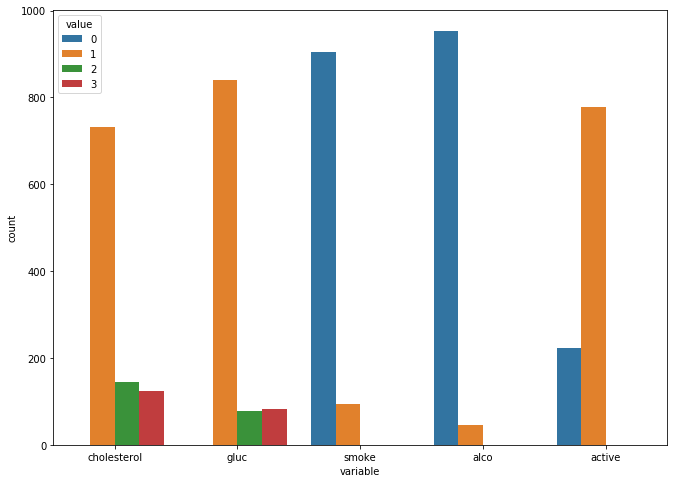

In [9]:
df_categorical = df.loc[:,['cholesterol','gluc', 'smoke', 'alco', 'active']]
sns.countplot(x="variable", hue="value",data= pd.melt(df_categorical));

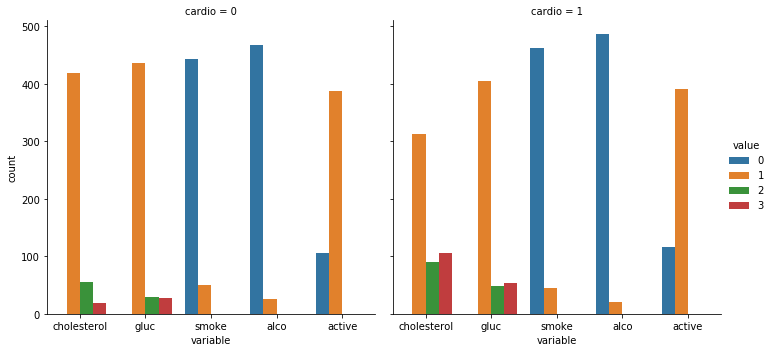

In [10]:
df_long = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active'])
sns.catplot(x="variable", hue="value", col='cardio',data=df_long, kind="count");

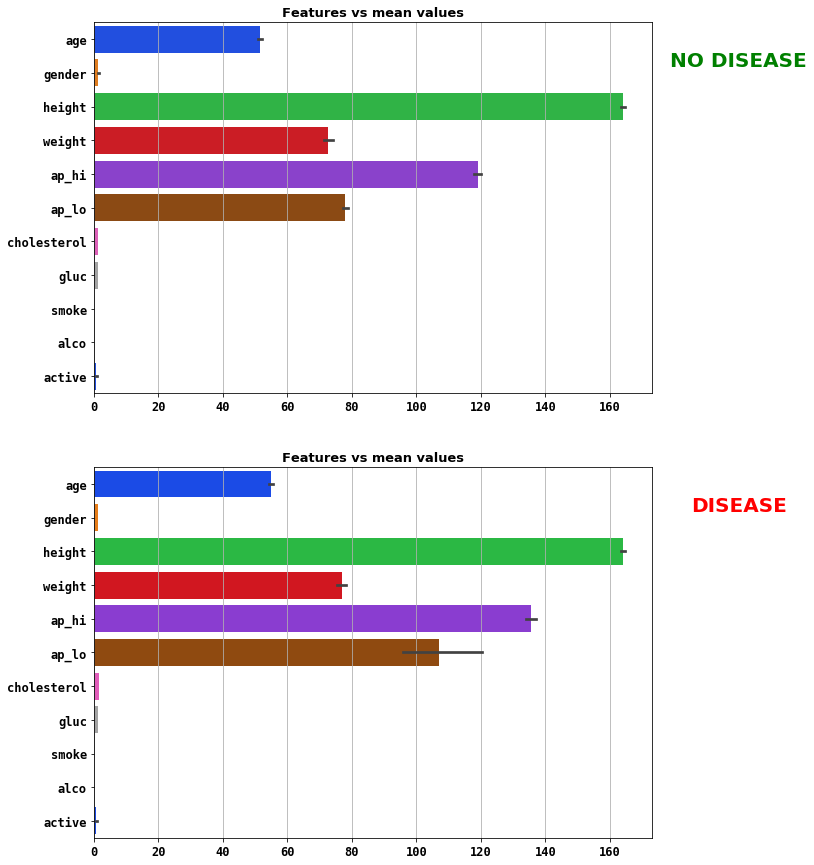

In [11]:
df['age'] = (df['age'] / 365).round().astype('int')
data=df[['age', 'gender','height', 'weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active','cardio']]
data1 = data[data['cardio']==0] # no disease  
data1 = data1.iloc[:,:-1]

data2 = data[data['cardio']==1] # with disease
data2 = data2.iloc[:,:-1]

fig = plt.figure(figsize=(10,15))

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212,sharex=ax1)

ax1.grid()
ax2.grid()

ax1.set_title('Features vs mean values',fontsize=13,weight='bold')
ax1.text(200,0.8,'NO DISEASE',fontsize=20,horizontalalignment='center',color='green',weight='bold')


ax2.set_title('Features vs mean values',fontsize=13,weight='bold')
ax2.text(200,0.8,'DISEASE',fontsize=20,horizontalalignment='center',color='red',weight='bold')

# for axis ax1
plt.sca(ax1)
plt.xticks(rotation = 0, 
           weight='bold', 
           family='monospace',
           size='large')
plt.yticks( weight='bold', 
           family='monospace',
           size='large')
# for axis ax2
plt.sca(ax2)
plt.xticks(rotation = 0, 
           weight='bold', 
           family='monospace',
           size='large')
plt.yticks( weight='bold', 
           family='monospace',
           size='large')

# sns.set_style('whitegrid')

sns.barplot(data=data1,ax=ax1,orient='horizontal', palette='bright') # no disease
sns.barplot(data=data2,ax=ax2,orient='horizontal',palette='bright',saturation=0.80) # with disease

In [12]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,48,1,156,56.0,100,60,1,1,0,0,0,0


[None, None, None, None]

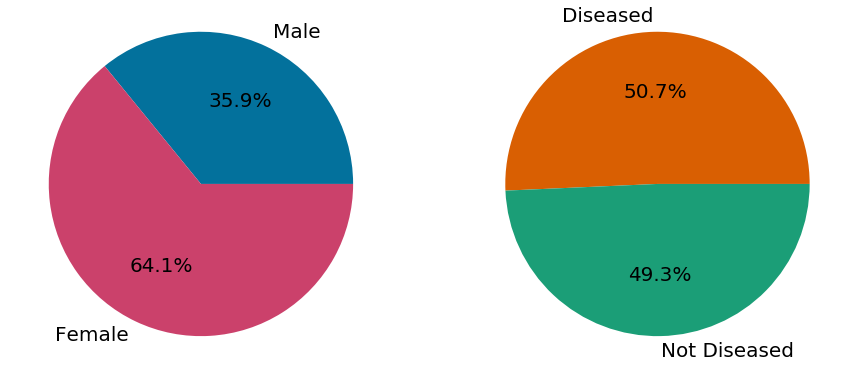

In [13]:
fig= plt.figure(figsize=(15,6)) 
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

only_gender = data['gender']
 
male_tot = only_gender[only_gender==2]                  #since 2 denotes men

no_of_male = len(male_tot)
no_of_female = len(data) - len(male_tot)

m_vs_f = [no_of_male,no_of_female]


with_disease = data[data['cardio']==1]
not_with_disease = data[data['cardio']==0]

with_disease = with_disease['gender']

no_of_diseased = len(with_disease)
no_of_not_diseased = len(data) - len(with_disease)

d_vs_healthy = [no_of_diseased,no_of_not_diseased]


'''
By default, plots have more pixels along one axis over the other.
When you add a circle, it's traditionally added in data units. 
If your axes have a symmetric range, that means one step along the x axis 
will involve a different number of pixels than one step along your y axis. 
So a symmetric circle in data units is asymmetric in your Pixel units (what you actually see).
'''

# you can force the x and y axes to have equal number of pixels per data unit. 
# This is done using the plt.axis("equal") or ax.axis("equal") methods 
# (where ax is an instance of an Axes). 

ax1.axis('equal')
ax2.axis('equal')

# pie plot
wedges, texts, autotexts= ax1.pie(m_vs_f, 
                                  labels=('Male','Female'),
                                  radius=1,
                                  textprops=dict(color='k'),
                                  colors=['xkcd:ocean blue','xkcd:dark pink'],
                                  autopct="%1.1f%%")

# pie plot
wedges2, texts2, autotexts2 = ax2.pie(d_vs_healthy, 
                                  labels=('Diseased','Not Diseased'),
                                  radius=1,
                                  textprops=dict(color='k'),
                                  colors=['#d95f02','#1b9e77'],
                                  autopct="%1.1f%%")


plt.setp(autotexts,size=20)
plt.setp(texts,size=20)
plt.setp(autotexts2,size=20)
plt.setp(texts2,size=20)
#print(m_vs_f)

Text(0,0.04,'Female')

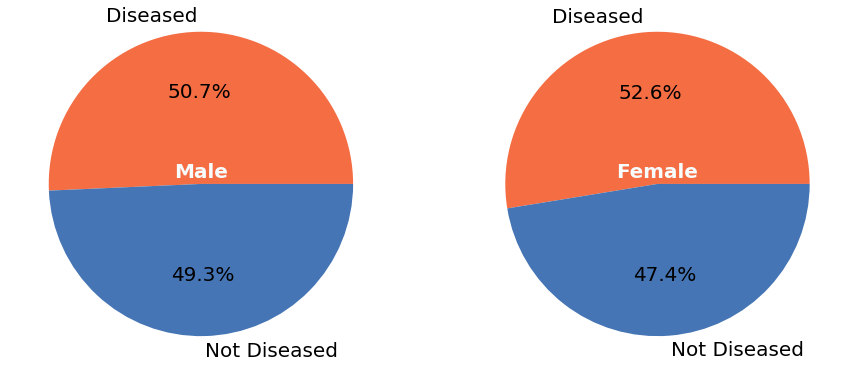

In [14]:
fig= plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

with_disease = data[data['cardio']==1]
not_with_disease = data[data['cardio']==0]

with_disease_m = with_disease[with_disease['gender']==2]
with_disease_m = with_disease['gender']
not_with_disease_m = not_with_disease[not_with_disease['gender']==2]
not_with_disease_m = not_with_disease['gender']

with_disease_f = with_disease[with_disease['gender']==1]
not_with_disease_f = not_with_disease[not_with_disease['gender']==1]

no_of_diseased_m = len(with_disease_m)
no_of_not_diseased_m = len(not_with_disease_m)

no_of_diseased_f = len(with_disease_f)
no_of_not_diseased_f = len(not_with_disease_f)

d_vs_healthy_m = [no_of_diseased_m, no_of_not_diseased_m]
d_vs_healthy_f = [no_of_diseased_f, no_of_not_diseased_f]

ax1.axis('equal')
ax2.axis('equal')
# pie plot

wedges, texts, autotexts = ax1.pie(d_vs_healthy_m, 
                                  labels=('Diseased','Not Diseased'),
                                  radius=1,
                                  textprops=dict(color='k'),
                                  colors=['#f46d43','#4575b4'],
                                  autopct="%1.1f%%")

wedges2, texts2, autotexts2 = ax2.pie(d_vs_healthy_f, 
                                  labels=('Diseased','Not Diseased'),
                                  radius=1,
                                  textprops=dict(color='k'),
                                  colors=['#f46d43','#4575b4'],
                                  autopct="%1.1f%%")

plt.setp(autotexts,size=20)
plt.setp(texts,size=20)

plt.setp(autotexts2,size=20)
plt.setp(texts2,size=20)

ax1.text(0,0.04,'Male',size=20,color='#f7fcfd',horizontalalignment='center',weight='bold')
ax2.text(0,0.04,'Female',size=20,color='#f7fcfd',horizontalalignment='center',weight='bold')

In [15]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,48,1,156,56.0,100,60,1,1,0,0,0,0


In [16]:
print("Diastilic pressure is higher than systolic blood pressure in {0} cases".format(data[data['ap_lo']> data['ap_hi']].shape[0]))

Diastilic pressure is higher than systolic blood pressure in 17 cases


In [17]:
data.drop(data[(data['ap_hi'] > data['ap_hi'].quantile(0.975)) | (data['ap_hi'] < data['ap_hi'].quantile(0.025))].index,inplace=True)
data.drop(data[(data['ap_lo'] > data['ap_lo'].quantile(0.975)) | (data['ap_lo'] < data['ap_lo'].quantile(0.025))].index,inplace=True)
print("Diastilic pressure is higher than systolic blood pressure in {0} cases".format(data[data['ap_lo']> data['ap_hi']].shape[0]))

Diastilic pressure is higher than systolic blood pressure in 0 cases


C:\Users\pande\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [18]:
data=(data-data.min())/(data.max()-data.min())

### Feature selection

In [19]:
import pandas
import numpy
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [20]:

all_features = data[['age', 'gender','height', 'weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active']].values

all_classes = data['cardio'].values

feature_names = ['age', 'gender','height', 'weight','ap_hi','ap_lo','cholestrol','gluc','smoke','alco','active']
all_feat

NameError: name 'all_feat' is not defined

### univariate selection

In [26]:
# feature extraction
test = SelectKBest(score_func=chi2, k=9)
fit = test.fit(all_features,all_classes)
print(fit.scores_)
features_univariate = fit.transform(all_features)
print(features_univariate[:5,:])

[7.21288056e+00 2.26106734e+00 1.32902641e-05 7.26533603e-01
 2.55472090e+01 1.20412272e+01 4.80171385e+01 9.10339411e+00
 9.54690876e-01 4.90470209e-01 6.64216291e-02]
[[0.42307692 1.         0.11538462 0.14285714 0.5        0.
  0.         0.         0.        ]
 [0.61538462 0.         0.26282051 0.57142857 0.75       1.
  0.         0.         0.        ]
 [0.5        0.         0.12820513 0.42857143 0.25       1.
  0.         0.         0.        ]
 [0.34615385 1.         0.24358974 0.71428571 1.         0.
  0.         0.         0.        ]
 [0.34615385 0.         0.07692308 0.         0.         0.
  0.         0.         0.        ]]


## Recursive feature elimination

In [21]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(model,9)
fit = rfe.fit(all_features,all_classes)
print("Num Features: %d" % (fit.n_features_))
print("Selected Features: %s"%(fit.support_))
print("Feature Ranking: %s" %(fit.ranking_))


Num Features: 9
Selected Features: [ True  True  True  True  True  True  True  True False False  True]
Feature Ranking: [1 1 1 1 1 1 1 1 3 2 1]


In [22]:
features_rfe=data[['age','height', 'weight','ap_hi','ap_lo','cholesterol','gluc','alco','active']].values

In [23]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(all_features,all_classes)
print(model.feature_importances_)

[0.16815542 0.02549966 0.15820334 0.18173258 0.18117022 0.13514187
 0.06355903 0.03557895 0.00932987 0.01078814 0.03084092]


In [24]:
features_tree=data[['age', 'gender','height', 'weight','ap_hi','ap_lo','cholesterol','gluc','active']].values
features_tree2=data[['age', 'gender','height', 'weight','ap_hi','ap_lo','cholesterol','gluc']].values

In [27]:
import numpy
from sklearn.model_selection import train_test_split

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(features_univariate, all_classes, train_size=0.75, random_state=0)

C:\Users\pande\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### Logistic regression

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
clf_uni = LogisticRegression()
cv_scores = cross_val_score(clf_uni,features_univariate, all_classes, cv=10)
cv_scores.mean()

0.7407838745800672

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
clf_tree = LogisticRegression()
cv_scores = cross_val_score(clf_tree,features_tree, all_classes, cv=10)
cv_scores.mean()

0.7387010078387457

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
clf_rfe = LogisticRegression()
cv_scores = cross_val_score(clf_rfe,features_rfe, all_classes, cv=10)
cv_scores.mean()

0.7323852183650615

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

clf_tree2 = RandomForestClassifier(n_estimators=10, random_state=1)
cv_scores = cross_val_score(clf_tree2,features_tree2, all_classes, cv=10)
cv_scores.mean()

0.7155095184770437

### best accuracy with features_rfe

In [32]:
y_pred=
from sklearn.metrics import confusion_matrix                   
cm = confusion_matrix(all_classes,y_pred)
cm

SyntaxError: invalid syntax (<ipython-input-32-19a158c19466>, line 1)

In [33]:
tp=cm[0][0]

NameError: name 'cm' is not defined

In [34]:
fn=cm[0][1]

NameError: name 'cm' is not defined

In [54]:
fp=cm[1][0]

In [55]:
tn=cm[1][1]


In [57]:
accuracy=(tp+tn)/(tp+tn+fp+fn)
accuracy

0.7212285714285714

In [59]:
tpr=tp/(tp+fn)    # recall or sensitivity
tpr

0.7643699494588961

In [61]:
tnr=tn/(tn+fp)    #specificality
tnr

0.6780353926641699

In [63]:
precision=tp/(tp+fp)
precision

0.7038731561094896

In [64]:
f_measure=(2*precision*tpr)/(precision+tpr)
f_measure

0.732875212177627

### Naive bayes

In [35]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import preprocessing
clf = MultinomialNB()
cv_scores = cross_val_score(clf,features_tree, all_classes, cv=10)

cv_scores.mean()

0.6554535274356103

In [36]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import preprocessing
clf = MultinomialNB()
cv_scores = cross_val_score(clf,features_tree2, all_classes, cv=10)

cv_scores.mean()

0.6744344904815229

In [37]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import preprocessing
clf = MultinomialNB()
cv_scores = cross_val_score(clf,features_rfe, all_classes, cv=10)

cv_scores.mean()

0.6417469204927212

In [38]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import preprocessing
clf = MultinomialNB()
cv_scores = cross_val_score(clf,features_univariate, all_classes, cv=10)

cv_scores.mean()

0.6070212765957448

### best accuracy with features_tree

### neural network

In [39]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

def create_model():
    model = Sequential()
    #4 feature inputs going into an 6-unit layer (more does not seem to help - in fact you can go down to 4)
    model.add(Dense(8, input_dim=9, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    # Output layer with a binary classification (benign or malignant)
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model; adam seemed to work best
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [43]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Wrap our Keras model in an estimator compatible with scikit_learn
estimator = KerasClassifier(build_fn=create_model, epochs=200, verbose=2)
# Now we can use scikit_learn's cross_val_score to evaluate this model identically to the others
cv_scores = cross_val_score(estimator,features_tree, all_classes, cv=2)
cv_scores.mean()

Epoch 1/200
 - 1s - loss: 0.6931 - acc: 0.5232
Epoch 2/200
 - 0s - loss: 0.6930 - acc: 0.5232
Epoch 3/200
 - 0s - loss: 0.6927 - acc: 0.5232
Epoch 4/200
 - 0s - loss: 0.6924 - acc: 0.5232
Epoch 5/200
 - 0s - loss: 0.6920 - acc: 0.5232
Epoch 6/200
 - 0s - loss: 0.6914 - acc: 0.5232
Epoch 7/200
 - 0s - loss: 0.6902 - acc: 0.5232
Epoch 8/200
 - 0s - loss: 0.6887 - acc: 0.5232
Epoch 9/200
 - 0s - loss: 0.6865 - acc: 0.5232
Epoch 10/200
 - 0s - loss: 0.6839 - acc: 0.5232
Epoch 11/200
 - 0s - loss: 0.6810 - acc: 0.5232
Epoch 12/200
 - 0s - loss: 0.6775 - acc: 0.5232
Epoch 13/200
 - 0s - loss: 0.6736 - acc: 0.5232
Epoch 14/200
 - 0s - loss: 0.6697 - acc: 0.5232
Epoch 15/200
 - 0s - loss: 0.6655 - acc: 0.5232
Epoch 16/200
 - 0s - loss: 0.6616 - acc: 0.5232
Epoch 17/200
 - 0s - loss: 0.6576 - acc: 0.5232
Epoch 18/200
 - 0s - loss: 0.6538 - acc: 0.5907
Epoch 19/200
 - 0s - loss: 0.6499 - acc: 0.6688
Epoch 20/200
 - 0s - loss: 0.6463 - acc: 0.6624
Epoch 21/200
 - 0s - loss: 0.6428 - acc: 0.6751
E

Epoch 171/200
 - 0s - loss: 0.5300 - acc: 0.7532
Epoch 172/200
 - 0s - loss: 0.5287 - acc: 0.7553
Epoch 173/200
 - 0s - loss: 0.5287 - acc: 0.7553
Epoch 174/200
 - 0s - loss: 0.5289 - acc: 0.7553
Epoch 175/200
 - 0s - loss: 0.5287 - acc: 0.7616
Epoch 176/200
 - 0s - loss: 0.5299 - acc: 0.7489
Epoch 177/200
 - 0s - loss: 0.5281 - acc: 0.7595
Epoch 178/200
 - 0s - loss: 0.5283 - acc: 0.7553
Epoch 179/200
 - 0s - loss: 0.5281 - acc: 0.7553
Epoch 180/200
 - 0s - loss: 0.5281 - acc: 0.7511
Epoch 181/200
 - 0s - loss: 0.5275 - acc: 0.7595
Epoch 182/200
 - 0s - loss: 0.5289 - acc: 0.7595
Epoch 183/200
 - 0s - loss: 0.5270 - acc: 0.7574
Epoch 184/200
 - 0s - loss: 0.5281 - acc: 0.7511
Epoch 185/200
 - 0s - loss: 0.5289 - acc: 0.7489
Epoch 186/200
 - 0s - loss: 0.5272 - acc: 0.7574
Epoch 187/200
 - 0s - loss: 0.5274 - acc: 0.7595
Epoch 188/200
 - 0s - loss: 0.5271 - acc: 0.7574
Epoch 189/200
 - 0s - loss: 0.5280 - acc: 0.7574
Epoch 190/200
 - 0s - loss: 0.5277 - acc: 0.7616
Epoch 191/200
 - 0s 

Epoch 141/200
 - 0s - loss: 0.5321 - acc: 0.7284
Epoch 142/200
 - 0s - loss: 0.5312 - acc: 0.7305
Epoch 143/200
 - 0s - loss: 0.5316 - acc: 0.7284
Epoch 144/200
 - 0s - loss: 0.5317 - acc: 0.7368
Epoch 145/200
 - 0s - loss: 0.5315 - acc: 0.7263
Epoch 146/200
 - 0s - loss: 0.5313 - acc: 0.7284
Epoch 147/200
 - 0s - loss: 0.5316 - acc: 0.7305
Epoch 148/200
 - 0s - loss: 0.5315 - acc: 0.7305
Epoch 149/200
 - 0s - loss: 0.5313 - acc: 0.7326
Epoch 150/200
 - 0s - loss: 0.5315 - acc: 0.7347
Epoch 151/200
 - 0s - loss: 0.5316 - acc: 0.7284
Epoch 152/200
 - 0s - loss: 0.5312 - acc: 0.7305
Epoch 153/200
 - 0s - loss: 0.5311 - acc: 0.7284
Epoch 154/200
 - 0s - loss: 0.5311 - acc: 0.7326
Epoch 155/200
 - 0s - loss: 0.5318 - acc: 0.7263
Epoch 156/200
 - 0s - loss: 0.5321 - acc: 0.7368
Epoch 157/200
 - 0s - loss: 0.5327 - acc: 0.7305
Epoch 158/200
 - 0s - loss: 0.5307 - acc: 0.7305
Epoch 159/200
 - 0s - loss: 0.5331 - acc: 0.7347
Epoch 160/200
 - 0s - loss: 0.5321 - acc: 0.7368
Epoch 161/200
 - 0s 

0.7376304690149025

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Wrap our Keras model in an estimator compatible with scikit_learn
estimator = KerasClassifier(build_fn=create_model, epochs=100, verbose=0)
# Now we can use scikit_learn's cross_val_score to evaluate this model identically to the others
cv_scores = cross_val_score(estimator,features_scaled, all_classes, cv=10)
cv_scores.mean()